# **CSE427 : MACHINE LEARNING [LAB PROJECT]**

--------------------------------------------------------------------------------

# **Multi-Level Explainable Machine Learning for Motorcycle Accident Severity Prediction: A Behavioral Risk Profiling Approach**

--------------------------------------------------------------------------------

# **Group:**

1. **Ahnaf Rahman Brinto [--------]**
2. **Fayaz Bin Faruk [--------]**

--------------------------------------------------------------------------------

# **LIBRARY IMPORTS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
import os
from datetime import datetime

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, silhouette_score
)
from sklearn.calibration import calibration_curve
from scipy import stats

# **DATASET**

In [ ]:
file_link = '' # download the dataset from the given link in README and upload it in your drive
id = file_link.split("/")[-2]

new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
shape = df.shape # number of observations and features
print(f"Rows: {shape[0]}")
print(f"Columns: {shape[1]}")
totalCells = shape[0] * shape[1]
print(f"Total Cells: {totalCells}")

Rows: 15102
Columns: 21
Total Cells: 317142


In [ ]:
df.head() # preview a sample

,Biker_Age,Biker_Occupation,Biker_Education_Level,Riding_Experience,Daily_Travel_Distance,Talk_While_Riding,Smoke_While_Riding,Wearing_Helmet,Motorcycle_Ownership,Valid_Driving_License,...,Road_Type,Road_condition,Weather,Time_of_Day,Traffic_Density,Speed_Limit,Bike_Speed,Number_of_Vehicles,Biker_Alcohol,Accident_Severity
0,28.0,Student,Above high school,5.0,34.0,Never,Sometimes,No,Bought with own money,No,...,Village Road,Wet,Rainy,Morning,3.0,50.0,61.0,1.0,0.0,Moderate Accident
1,29.0,Student,Above high school,0.0,1.0,Never,Never,No,Inherited,Yes,...,Village Road,Dry,Clear,Afternoon,2.0,50.0,93.0,3.0,0.0,Moderate Accident
2,29.0,Student,Above high school,2.0,3.0,Regularly,Sometimes,No,Bought with own money,No,...,Village Road,Dry,Foggy,Night,7.0,50.0,77.0,3.0,1.0,Moderate Accident
3,22.0,Student,Above high school,2.0,43.0,Never,Never,No,Inherited,No,...,Village Road,Wet,Rainy,Afternoon,8.0,50.0,88.0,1.0,0.0,Moderate Accident
4,17.0,Student,Above high school,2.0,41.0,Regularly,Sometimes,Yes,Inherited,Yes,...,Village Road,Dry,Clear,Noon,5.0,50.0,92.0,1.0,1.0,Moderate Accident


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15102 entries, 0 to 15101
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Biker_Age              15100 non-null  float64
 1   Biker_Occupation       15100 non-null  object 
 2   Biker_Education_Level  15100 non-null  object 
 3   Riding_Experience      15100 non-null  float64
 4   Daily_Travel_Distance  15100 non-null  float64
 5   Talk_While_Riding      15100 non-null  object 
 6   Smoke_While_Riding     15100 non-null  object 
 7   Wearing_Helmet         15100 non-null  object 
 8   Motorcycle_Ownership   15100 non-null  object 
 9   Valid_Driving_License  15100 non-null  object 
 10  Bike_Condition         15100 non-null  object 
 11  Road_Type              15100 non-null  object 
 12  Road_condition         15100 non-null  object 
 13  Weather                15100 non-null  object 
 14  Time_of_Day            15100 non-null  object 
 15  Tr

In [ ]:
dtype_counts = df.dtypes.value_counts()

for dtype, count in dtype_counts.items():
  print(f"{dtype}: {count} columns")

object: 13 columns
float64: 8 columns


In [ ]:
df.describe(include='all')

,Biker_Age,Biker_Occupation,Biker_Education_Level,Riding_Experience,Daily_Travel_Distance,Talk_While_Riding,Smoke_While_Riding,Wearing_Helmet,Motorcycle_Ownership,Valid_Driving_License,...,Road_Type,Road_condition,Weather,Time_of_Day,Traffic_Density,Speed_Limit,Bike_Speed,Number_of_Vehicles,Biker_Alcohol,Accident_Severity
count,15100.000000,15100,15100,15100.000000,15100.000000,15100,15100,15100,15100,15100,...,15100,15100,15100,15100,15100.000000,15100.000000,15100.000000,15100.000000,15100.000000,15100
unique,NaN,4,3,NaN,NaN,3,3,2,2,2,...,3,2,3,5,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Student,Above high school,NaN,NaN,Sometimes,Sometimes,Yes,Bought with own money,Yes,...,City Road,Dry,Clear,Afternoon,NaN,NaN,NaN,NaN,NaN,Moderate Accident
freq,NaN,5342,9529,NaN,NaN,6549,7936,7936,10285,8177,...,5608,10019,5363,6900,NaN,NaN,NaN,NaN,NaN,5350
mean,36.166821,NaN,NaN,7.471628,41.198046,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.340596,66.985298,83.293841,2.841523,0.167417,NaN
std,15.063758,NaN,NaN,6.426752,31.712596,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.219006,12.371008,21.757871,1.902515,0.373360,NaN
min,15.000000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.000000,40.000000,20.000000,1.000000,0.000000,NaN
25%,24.000000,NaN,NaN,2.000000,17.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.000000,60.000000,69.000000,1.000000,0.000000,NaN
50%,31.000000,NaN,NaN,5.000000,31.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.000000,70.000000,86.000000,2.000000,0.000000,NaN
75%,49.000000,NaN,NaN,12.000000,60.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.000000,80.000000,99.000000,3.000000,0.000000,NaN


In [ ]:
df.describe(include='object') #some additional information on categorical features

,Biker_Occupation,Biker_Education_Level,Talk_While_Riding,Smoke_While_Riding,Wearing_Helmet,Motorcycle_Ownership,Valid_Driving_License,Bike_Condition,Road_Type,Road_condition,Weather,Time_of_Day,Accident_Severity
count,15100,15100,15100,15100,15100,15100,15100,15100,15100,15100,15100,15100,15100
unique,4,3,3,3,2,2,2,2,3,2,3,5,3
top,Student,Above high school,Sometimes,Sometimes,Yes,Bought with own money,Yes,New,City Road,Dry,Clear,Afternoon,Moderate Accident
freq,5342,9529,6549,7936,7936,10285,8177,8257,5608,10019,5363,6900,5350


In [ ]:
df.describe().T  #This method gives a statistical summary of the DataFrame (Transpose)

,count,mean,std,min,25%,50%,75%,max
Biker_Age,15100.0,36.166821,15.063758,15.0,24.0,31.0,49.0,70.0
Riding_Experience,15100.0,7.471628,6.426752,0.0,2.0,5.0,12.0,30.0
Daily_Travel_Distance,15100.0,41.198046,31.712596,0.0,17.0,31.0,60.0,150.0
Traffic_Density,15100.0,4.340596,2.219006,1.0,2.0,4.0,6.0,8.0
Speed_Limit,15100.0,66.985298,12.371008,40.0,60.0,70.0,80.0,80.0
Bike_Speed,15100.0,83.293841,21.757871,20.0,69.0,86.0,99.0,120.0
Number_of_Vehicles,15100.0,2.841523,1.902515,1.0,1.0,2.0,3.0,8.0
Biker_Alcohol,15100.0,0.167417,0.373360,0.0,0.0,0.0,0.0,1.0


In [ ]:
df[df.duplicated()] #check duplicated rows

,Biker_Age,Biker_Occupation,Biker_Education_Level,Riding_Experience,Daily_Travel_Distance,Talk_While_Riding,Smoke_While_Riding,Wearing_Helmet,Motorcycle_Ownership,Valid_Driving_License,...,Road_Type,Road_condition,Weather,Time_of_Day,Traffic_Density,Speed_Limit,Bike_Speed,Number_of_Vehicles,Biker_Alcohol,Accident_Severity
15101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.nunique()

,0
Biker_Age,56
Biker_Occupation,4
Biker_Education_Level,3
Riding_Experience,40
Daily_Travel_Distance,152
Talk_While_Riding,3
Smoke_While_Riding,3
Wearing_Helmet,2
Motorcycle_Ownership,2
Valid_Driving_License,2


In [ ]:
df.isnull().sum()

,0
Biker_Age,2
Biker_Occupation,2
Biker_Education_Level,2
Riding_Experience,2
Daily_Travel_Distance,2
Talk_While_Riding,2
Smoke_While_Riding,2
Wearing_Helmet,2
Motorcycle_Ownership,2
Valid_Driving_License,2


Missing Values:


,Column,Missing_Count,Missing_Percent
0,Biker_Age,2,0.013243
1,Biker_Occupation,2,0.013243
2,Biker_Education_Level,2,0.013243
3,Riding_Experience,2,0.013243
4,Daily_Travel_Distance,2,0.013243
5,Talk_While_Riding,2,0.013243
6,Smoke_While_Riding,2,0.013243
7,Wearing_Helmet,2,0.013243
8,Motorcycle_Ownership,2,0.013243
9,Valid_Driving_License,2,0.013243


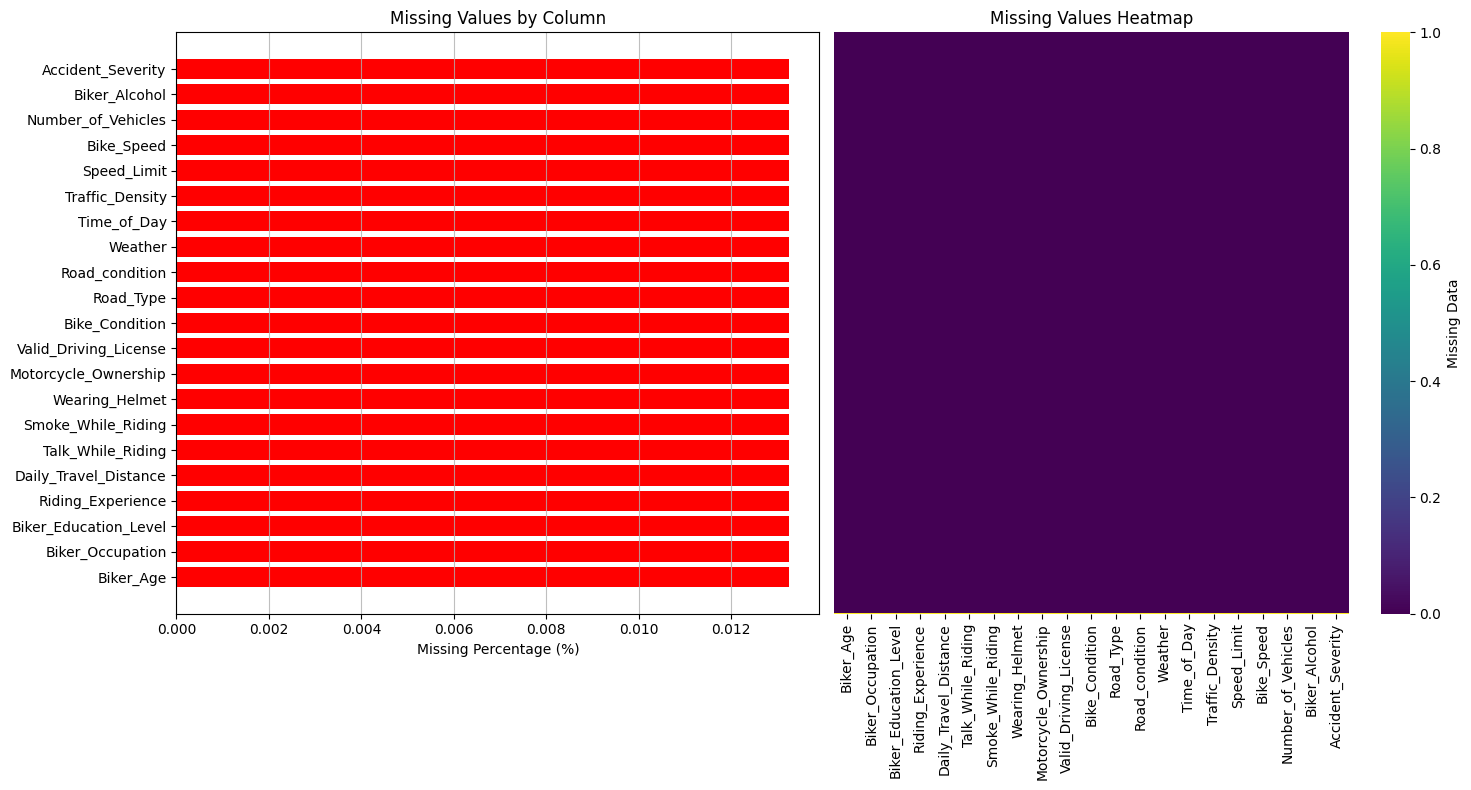

In [ ]:
missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Column': df.columns,
                           'Missing_Count': missing_count.values,
                           'Missing_Percent': missing_percent.values})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:

        print(f"Missing Values:")
        display(missing_df)

        # missing value visualization
        fig, axes = plt.subplots(1, 2, figsize=(15, 8))

        # bar plot
        axes[0].barh(missing_df['Column'], missing_df['Missing_Percent'],color='red')
        axes[0].set_xlabel('Missing Percentage (%)')
        axes[0].set_title('Missing Values by Column')
        axes[0].grid(axis='x', alpha=0.8)

        # Heatmap
        plt.sca(axes[1])
        sns.heatmap(df.isnull(), cbar=True, cmap='viridis',
                    yticklabels=False, cbar_kws={'label': 'Missing Data'})
        axes[1].set_title('Missing Values Heatmap')

        plt.tight_layout()
        plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {len(numeric_cols)} ")
print(f"Columns: {', '.join(numeric_cols)}")

Numerical columns: 8 
Columns: Biker_Age, Riding_Experience, Daily_Travel_Distance, Traffic_Density, Speed_Limit, Bike_Speed, Number_of_Vehicles, Biker_Alcohol


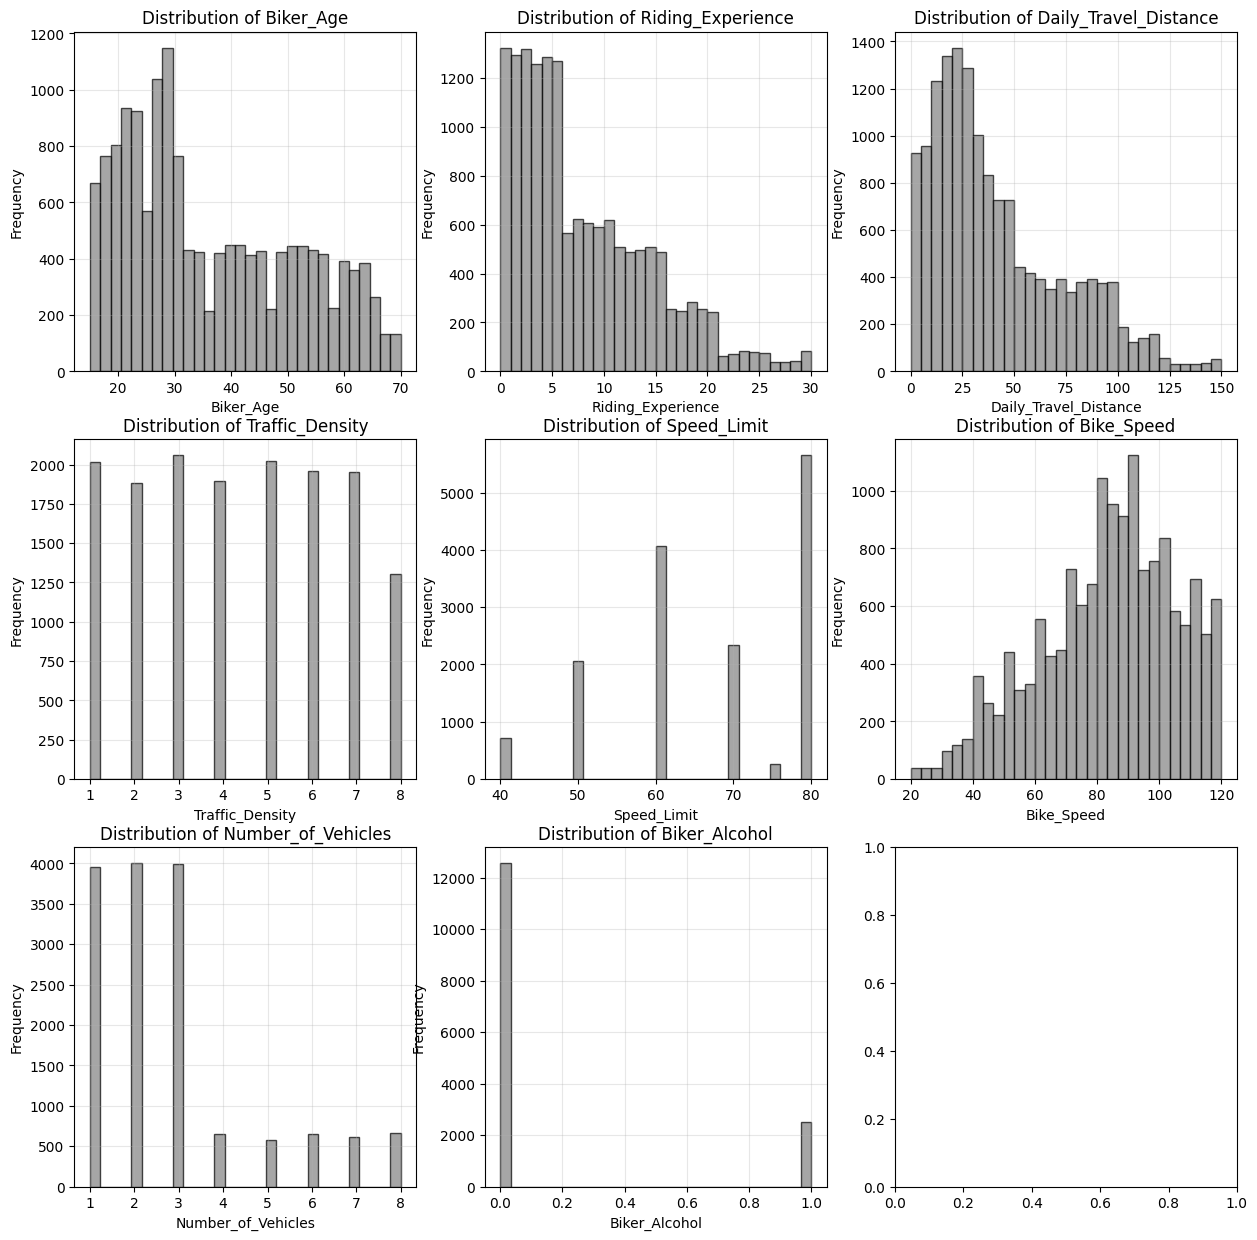

In [ ]:
n_cols = min(3, len(numeric_cols))
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

for idx, col in enumerate(numeric_cols):
  axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', color='grey', alpha=0.7)
  axes[idx].set_title(f'Distribution of {col}')
  axes[idx].set_xlabel(col)
  axes[idx].set_ylabel('Frequency')
  axes[idx].grid(alpha=0.3)

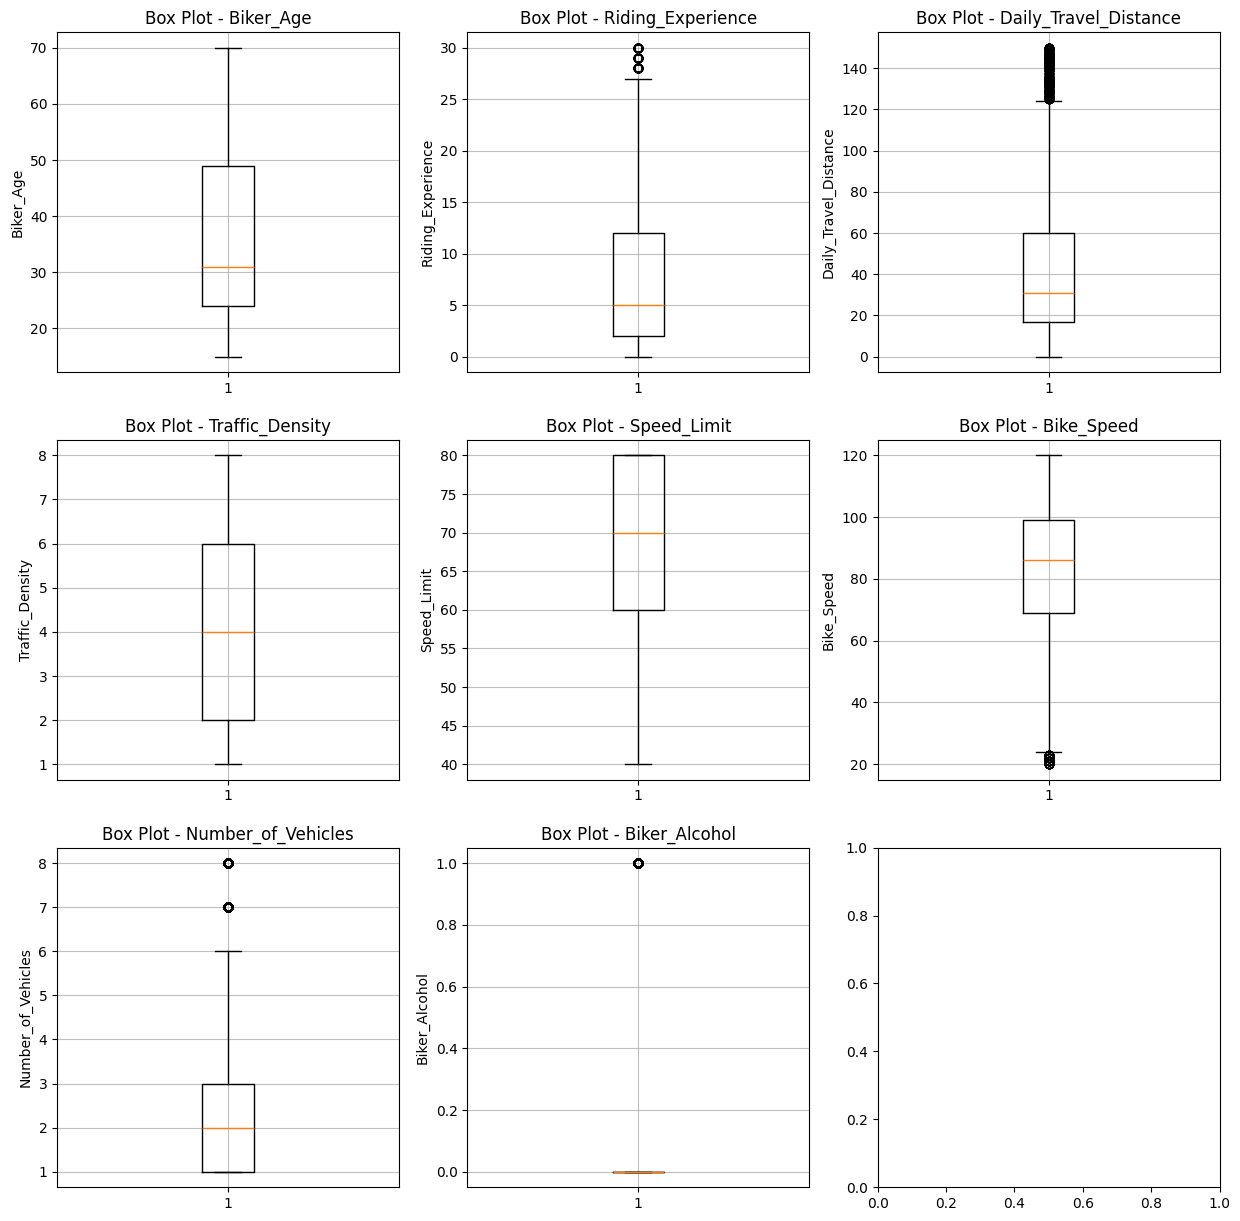

In [ ]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if len(numeric_cols) > 1 else [axes]

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_title(f'Box Plot - {col}')
    axes[idx].set_ylabel(col)
    axes[idx].grid(alpha=0.8)

In [ ]:
import math
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
top_n = 10

print(f"Categorical columns: {len(categorical_cols)}")

for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Most common values:")
    print(df[col].value_counts().head(top_n))

Categorical columns: 13

--- Biker_Occupation ---
Unique values: 4
Most common values:
Biker_Occupation
Student     5342
Others      3865
Business    2989
Service     2904
Name: count, dtype: int64

--- Biker_Education_Level ---
Unique values: 3
Most common values:
Biker_Education_Level
Above high school        9529
High school              3725
Less than high school    1846
Name: count, dtype: int64

--- Talk_While_Riding ---
Unique values: 3
Most common values:
Talk_While_Riding
Sometimes    6549
Never        4314
Regularly    4237
Name: count, dtype: int64

--- Smoke_While_Riding ---
Unique values: 3
Most common values:
Smoke_While_Riding
Sometimes    7936
Never        6164
Regularly    1000
Name: count, dtype: int64

--- Wearing_Helmet ---
Unique values: 2
Most common values:
Wearing_Helmet
Yes    7936
No     7164
Name: count, dtype: int64

--- Motorcycle_Ownership ---
Unique values: 2
Most common values:
Motorcycle_Ownership
Bought with own money    10285
Inherited                

/tmp/ipython-input-1484931899.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
/tmp/ipython-input-1484931899.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
/tmp/ipython-input-1484931899.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
/tmp/ipython-input-1484931899.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
/tmp/ipython-input-1484931899.py:17: UserWarning: set_ticklabels() should on

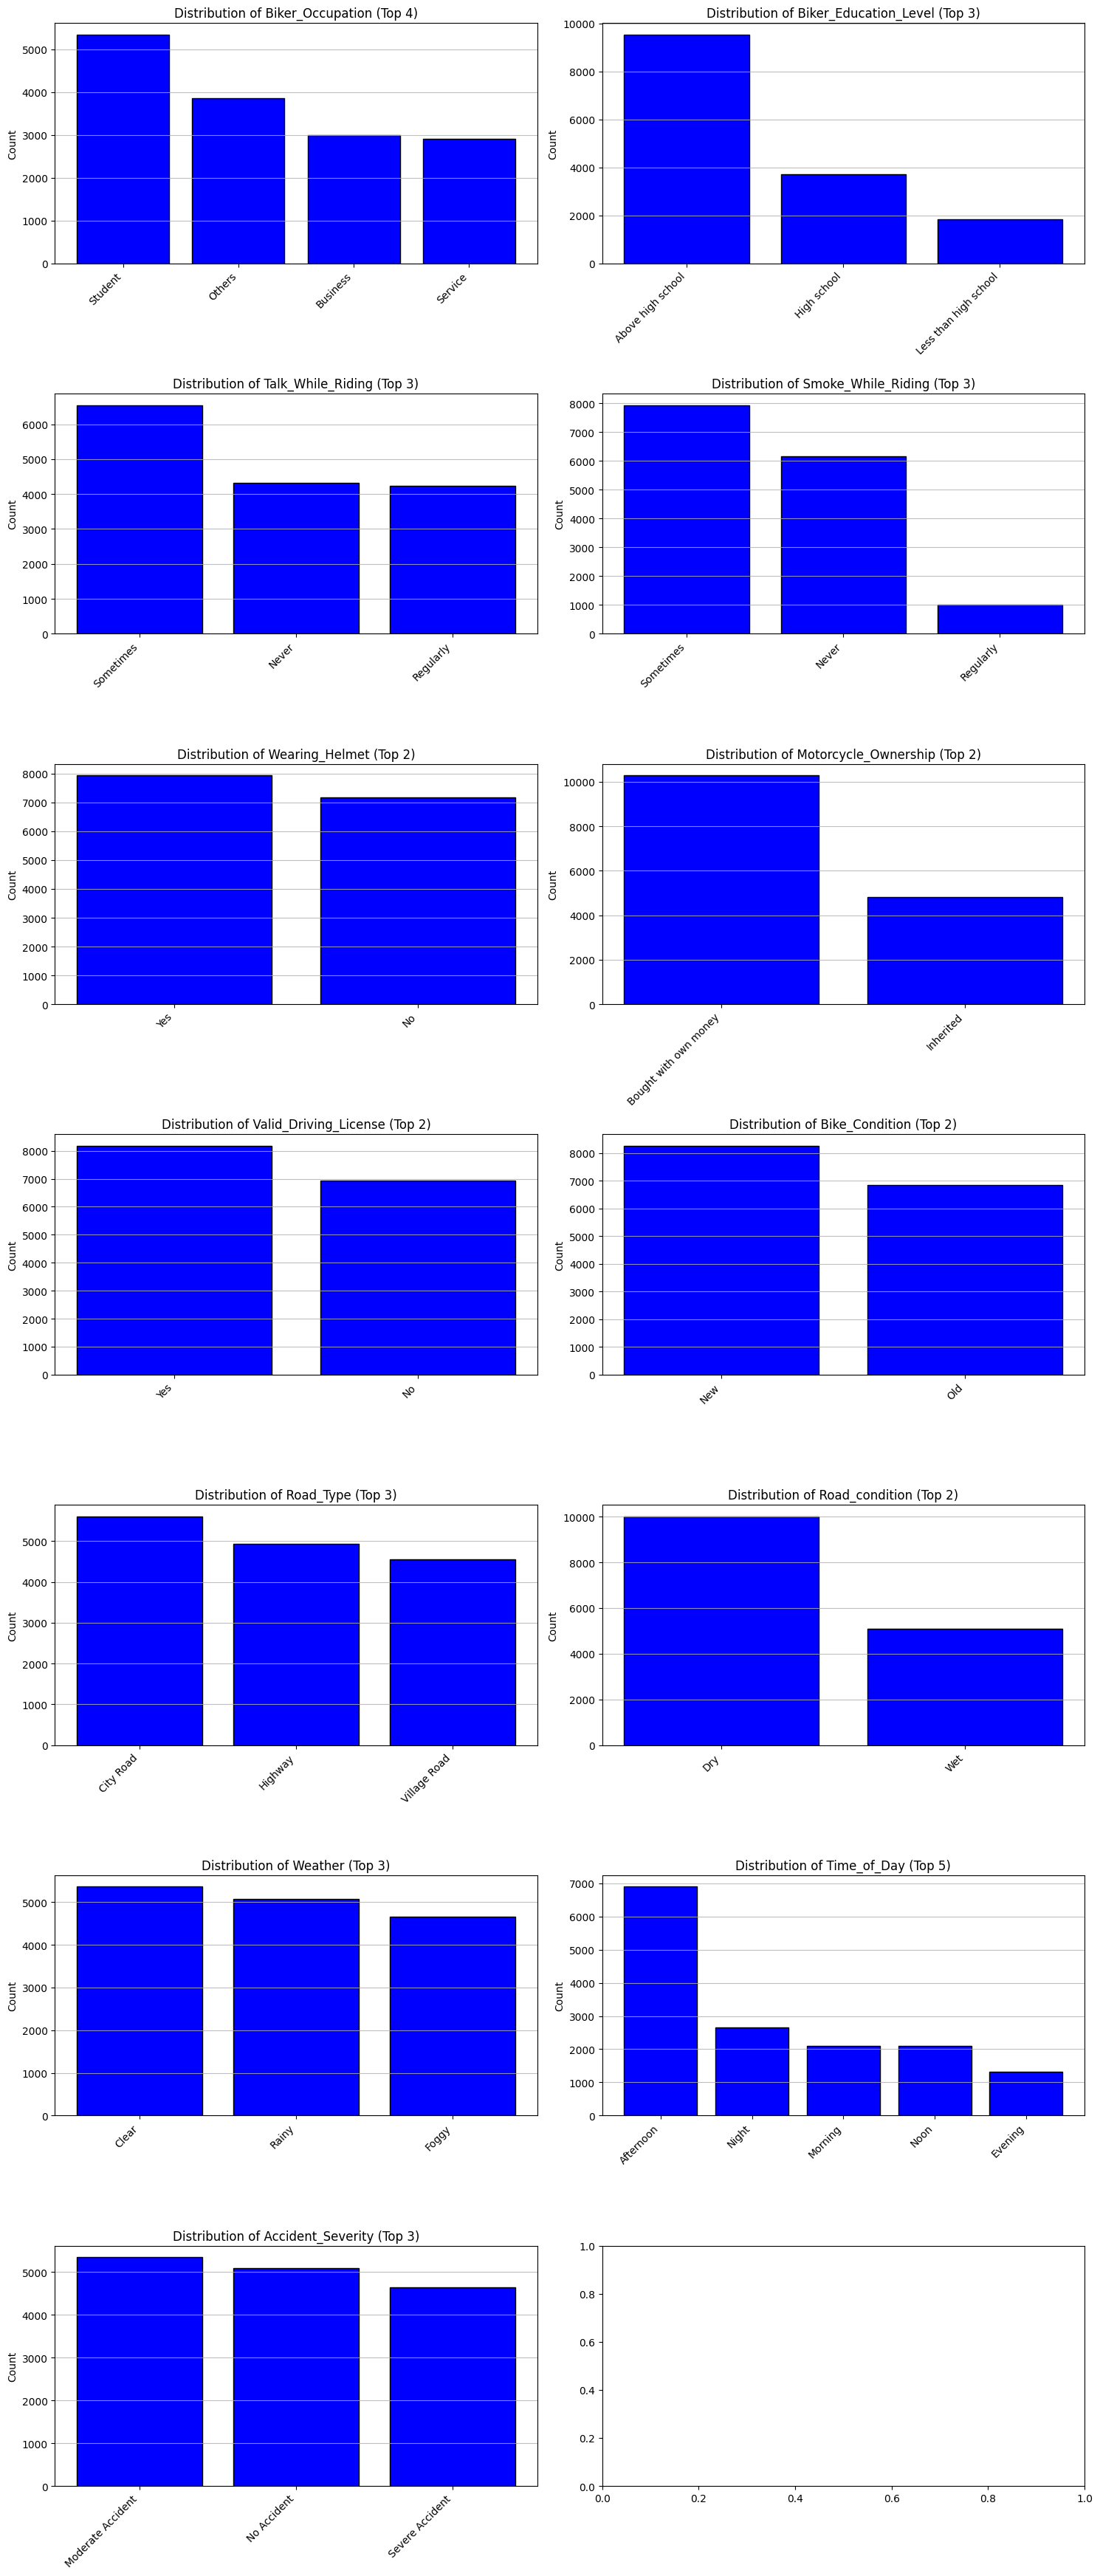

In [ ]:
plot_cols = [col for col in categorical_cols if df[col].nunique() <= 20]

if len(plot_cols) > 0:
    n_cols = 2   # number of charts per row
    n_rows = math.ceil(len(plot_cols) / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()

    for idx, col in enumerate(plot_cols):
        ax = axes[idx]
        value_counts = df[col].value_counts().head(top_n)

        ax.bar(value_counts.index, value_counts.values,
               color='blue', edgecolor='black')
        ax.set_title(f'Distribution of {col} (Top {min(top_n, len(value_counts))})')
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
        ax.set_ylabel('Count')
        ax.grid(axis='y', alpha=0.8)

    plt.tight_layout()
    plt.show()

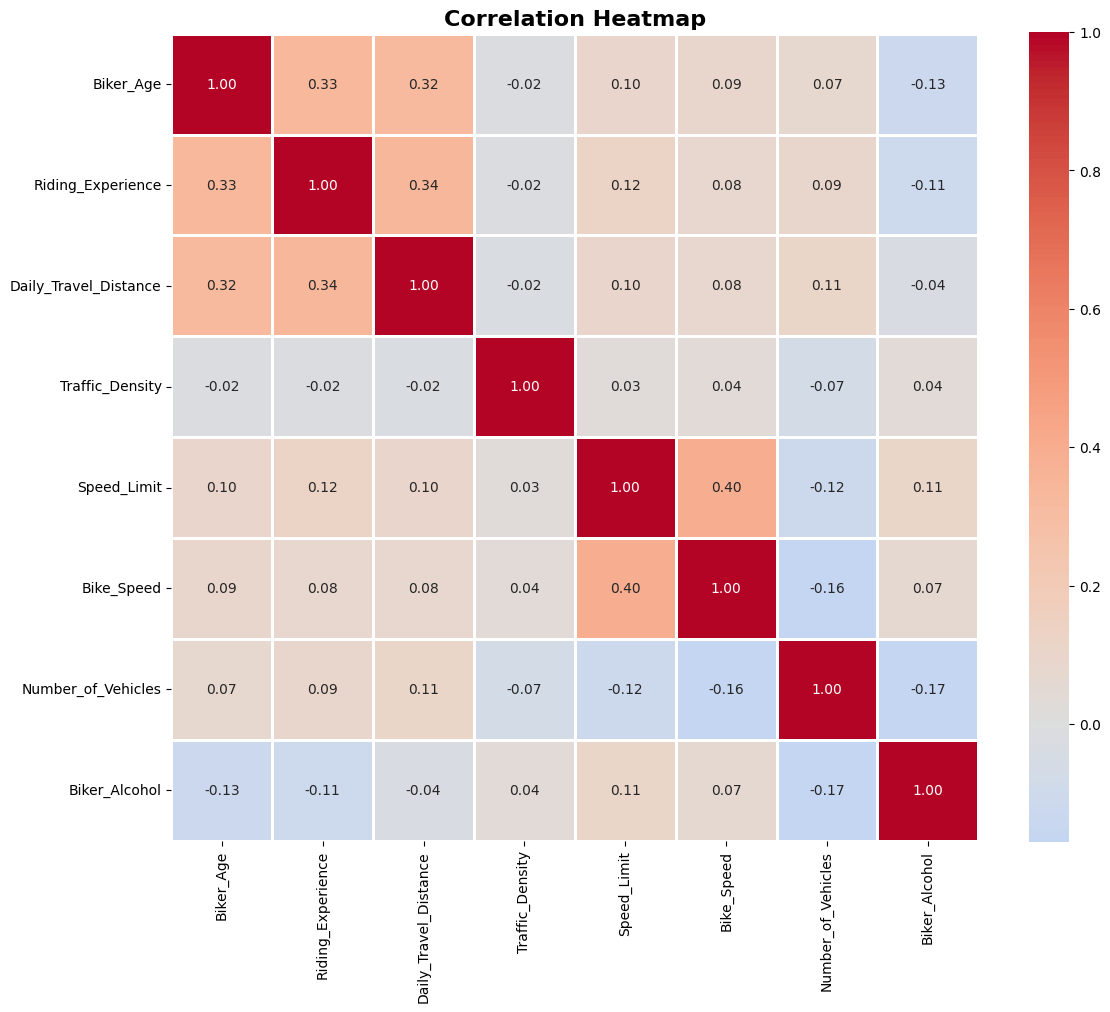

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

corr_matrix = df[numeric_cols].corr()
# display(corr_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

outlier_summary = []

for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(df)) * 100

        outlier_summary.append({

            'Column': col,
            'Outlier_Count': outlier_count,
            'Outlier_Percent': outlier_percent,
            'Lower_Bound': lower_bound,
            'Upper_Bound': upper_bound

        })

outlier_df = pd.DataFrame(outlier_summary)
outlier_df = outlier_df[outlier_df['Outlier_Count'] > 0].sort_values('Outlier_Count', ascending=False)

if len(outlier_df) > 0:
        print(f"Columns with Outliers:")
        display(outlier_df)

Columns with Outliers:


,Column,Outlier_Count,Outlier_Percent,Lower_Bound,Upper_Bound
7,Biker_Alcohol,2528,16.739505,0.0,0.0
6,Number_of_Vehicles,1276,8.449212,-2.0,6.0
2,Daily_Travel_Distance,179,1.185273,-47.5,124.5
1,Riding_Experience,126,0.834327,-13.0,27.0
5,Bike_Speed,37,0.245001,24.0,144.0



# **TRAIN-TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

# copy of the original data
df_clean = df.copy()

# duplicates removal
dup_count = df_clean.duplicated().sum()
if dup_count > 0:
    df_clean.drop_duplicates(inplace=True)
    print(f"Removed {dup_count} duplicate rows")

# rows with missing values --> remove
initial_rows = df_clean.shape[0]
df_clean.dropna(inplace=True)
dropped_rows = initial_rows - df_clean.shape[0]
if dropped_rows > 0:
    print(f"Removed {dropped_rows} rows with NaN values.")

# features and target Separation
X_raw = df_clean.drop('Accident_Severity', axis=1)
y_raw = df_clean['Accident_Severity']

# 80-20 split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X_raw, y_raw, test_size=0.2, random_state=42, stratify=y_raw)

print(f"Training set: {X_train_raw.shape[0]} samples")
print(f"Test set: {X_test_raw.shape[0]} samples")

Removed 1 duplicate rows
Removed 1 rows with NaN values.
Training set: 12080 samples
Test set: 3020 samples


# **DATA PREPROCESSING (On Training Set)**

In [ ]:
# copies for preprocessing
X_train_processed = X_train_raw.copy()
X_test_processed = X_test_raw.copy()
y_train_processed = y_train_raw.copy()
y_test_processed = y_test_raw.copy()

/tmp/ipython-input-37874414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame({'Accident_Severity': y_train_processed}),
/tmp/ipython-input-37874414.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pd.DataFrame({'Accident_Severity': y_test_processed}),


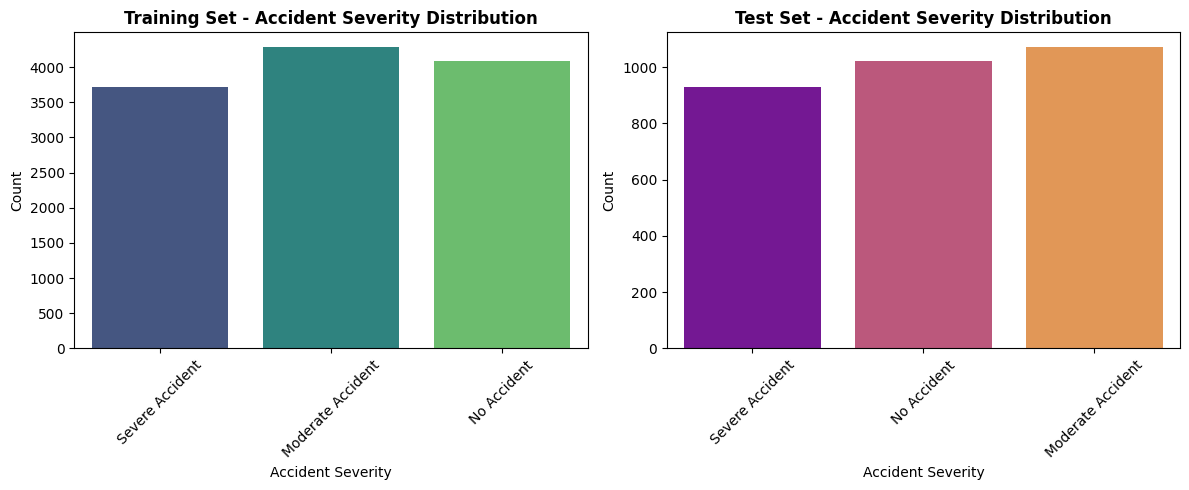

In [ ]:
# Target distribution Visuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=pd.DataFrame({'Accident_Severity': y_train_processed}),
              x='Accident_Severity', palette='viridis')
plt.title('Training Set - Accident Severity Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(data=pd.DataFrame({'Accident_Severity': y_test_processed}),
              x='Accident_Severity', palette='plasma')
plt.title('Test Set - Accident Severity Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Accident Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# 1. Age categories
X_train_processed['Age_Category'] = pd.cut(
    X_train_processed['Biker_Age'],
    bins=[0, 25, 35, 50, 100],
    labels=['Young', 'Adult', 'Middle-aged', 'Senior']
)
X_test_processed['Age_Category'] = pd.cut(
    X_test_processed['Biker_Age'],
    bins=[0, 25, 35, 50, 100],
    labels=['Young', 'Adult', 'Middle-aged', 'Senior']
)

In [ ]:
# 2. Behavioral Risk Score
X_train_processed['Behavioral_Risk_Score'] = (
    X_train_processed['Talk_While_Riding'].map({'Yes': 1, 'No': 0}).fillna(0) +
    X_train_processed['Smoke_While_Riding'].map({'Yes': 1, 'No': 0}).fillna(0) +
    X_train_processed['Wearing_Helmet'].map({'No': 1, 'Yes': 0}).fillna(0) +
    X_train_processed['Valid_Driving_License'].map({'No': 1, 'Yes': 0}).fillna(0) +
    X_train_processed['Biker_Alcohol'] * 2
)

X_test_processed['Behavioral_Risk_Score'] = (
    X_test_processed['Talk_While_Riding'].map({'Yes': 1, 'No': 0}).fillna(0) +
    X_test_processed['Smoke_While_Riding'].map({'Yes': 1, 'No': 0}).fillna(0) +
    X_test_processed['Wearing_Helmet'].map({'No': 1, 'Yes': 0}).fillna(0) +
    X_test_processed['Valid_Driving_License'].map({'No': 1, 'Yes': 0}).fillna(0) +
    X_test_processed['Biker_Alcohol'] * 2
)

# 3. Speed Violation
X_train_processed['Speed_Violation'] = (
    X_train_processed['Bike_Speed'] > X_train_processed['Speed_Limit']
).astype(int)
X_test_processed['Speed_Violation'] = (
    X_test_processed['Bike_Speed'] > X_test_processed['Speed_Limit']
).astype(int)

# 4. Time Category
time_mapping = {
    'Morning': 'Day',
    'Afternoon': 'Day',
    'Noon': 'Day',
    'Evening': 'Evening',
    'Night': 'Night'
}
X_train_processed['Time_Category'] = X_train_processed['Time_of_Day'].map(time_mapping)
X_test_processed['Time_Category'] = X_test_processed['Time_of_Day'].map(time_mapping)

print("Feature engineering completed")

Feature engineering completed


In [ ]:
# featureDrop
features_to_drop = [
    'Speed_Limit',  # Speed_Violation captures this
    'Bike_Speed'    # Speed_Violation captures this
]

X_train_processed.drop(columns=features_to_drop, inplace=True)
X_test_processed.drop(columns=features_to_drop, inplace=True)
print(f"Dropped {len(features_to_drop)} redundant features")

Dropped 2 redundant features


In [ ]:
# ENCODING
categorical_cols = X_train_processed.select_dtypes(include=['object', 'category']).columns.tolist()
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train_processed[col] = le.fit_transform(X_train_processed[col].astype(str))
    X_test_processed[col] = X_test_processed[col].astype(str).map(
        lambda x: le.transform([x])[0] if x in le.classes_ else -1
    )
    label_encoders[col] = le

print(f"Encoded {len(categorical_cols)} categorical features")

Encoded 14 categorical features


In [ ]:
# Encode target
target_encoder = LabelEncoder()
y_train = target_encoder.fit_transform(y_train_processed)
y_test = target_encoder.transform(y_test_processed)

print(f"Target encoded: {dict(enumerate(target_encoder.classes_))}")

Target encoded: {0: 'Moderate Accident', 1: 'No Accident', 2: 'Severe Accident'}


In [ ]:
# SCALING
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_processed)
X_test_scaled = scaler.transform(X_test_processed)

X_train_scaled = pd.DataFrame(
    X_train_scaled,
    columns=X_train_processed.columns,
    index=X_train_processed.index
)
X_test_scaled = pd.DataFrame(
    X_test_scaled,
    columns=X_test_processed.columns,
    index=X_test_processed.index
)

# **`DATA SUMMARY`**

In [ ]:
print("Final Dataset Summary:")
print("="*50)
print(f"Training set: {X_train_scaled.shape[0]} samples, {X_train_scaled.shape[1]} features")
print(f"Test set: {X_test_scaled.shape[0]} samples, {X_test_scaled.shape[1]} features")
print("\nTraining class distribution:")
print(pd.Series(y_train).value_counts().sort_index())
print("\nTest class distribution:")
print(pd.Series(y_test).value_counts().sort_index())

Final Dataset Summary:
Training set: 12080 samples, 22 features
Test set: 3020 samples, 22 features

Training class distribution:
0    4280
1    4080
2    3720
Name: count, dtype: int64

Test class distribution:
0    1070
1    1020
2     930
Name: count, dtype: int64


# **`BASELINE MODELS IMPLEMENTATION`**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix,
                             roc_auc_score, roc_curve)
from sklearn.preprocessing import label_binarize
import time

In [ ]:
# results
model_results = {}

In [ ]:
# 1. Logistic Regression
print("1. Logistic Regression...")
start_time = time.time()

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)

lr_time = time.time() - start_time

model_results['Logistic Regression'] = {
    'model': lr_model,
    'predictions': lr_pred,
    'probabilities': lr_pred_proba,
    'training_time': lr_time
}

print(f"Training completed in {lr_time:.2f} seconds")

1. Logistic Regression...
Training completed in 0.38 seconds


In [ ]:
# 2. Decision Tree
print("2. Decision Tree...")
start_time = time.time()

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_pred_proba = dt_model.predict_proba(X_test_scaled)

dt_time = time.time() - start_time

model_results['Decision Tree'] = {
    'model': dt_model,
    'predictions': dt_pred,
    'probabilities': dt_pred_proba,
    'training_time': dt_time
}

print(f"Training completed in {dt_time:.2f} seconds")

2. Decision Tree...
Training completed in 0.11 seconds


In [ ]:
# 3. Random Forest
print("3. Random Forest...")
start_time = time.time()

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_pred_proba = rf_model.predict_proba(X_test_scaled)

rf_time = time.time() - start_time

model_results['Random Forest'] = {
    'model': rf_model,
    'predictions': rf_pred,
    'probabilities': rf_pred_proba,
    'training_time': rf_time
}

print(f"Training completed in {rf_time:.2f} seconds")

3. Random Forest...
Training completed in 1.82 seconds


# **`ADVANCED MODELS`**

In [ ]:
# 4. XGBoost with Hyperparameter Tuning
print("4. Training XGBoost with Hyperparameter Tuning...")
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

start_time = time.time()

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Base model
xgb_base = xgb.XGBClassifier(
    random_state=42,
    eval_metric='mlogloss'
)

# Grid search with 3-fold cross-validation
print("Performing grid search...")
grid_search = GridSearchCV(
    xgb_base,
    param_grid,
    cv=3,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Best model
xgb_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV F1-score: {grid_search.best_score_:.4f}")

xgb_pred = xgb_model.predict(X_test_scaled)
xgb_pred_proba = xgb_model.predict_proba(X_test_scaled)

xgb_time = time.time() - start_time

model_results['XGBoost'] = {
    'model': xgb_model,
    'predictions': xgb_pred,
    'probabilities': xgb_pred_proba,
    'training_time': xgb_time,
    'best_params': grid_search.best_params_
}

print(f"Training completed in {xgb_time:.2f} seconds")

4. Training XGBoost with Hyperparameter Tuning...
Performing grid search...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1.0}
Best CV F1-score: 0.9548
Training completed in 162.05 seconds


In [ ]:
# 5. Multilayer Perceptrons (MLP)
print("5. Training Multilayer Perceptrons (MLP)...")
from sklearn.neural_network import MLPClassifier

start_time = time.time()

mlp_model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    max_iter=500,
    random_state=42,
    early_stopping=True
)
mlp_model.fit(X_train_scaled, y_train)
mlp_pred = mlp_model.predict(X_test_scaled)
mlp_pred_proba = mlp_model.predict_proba(X_test_scaled)

mlp_time = time.time() - start_time

model_results['Multilayer Perceptrons'] = {
    'model': mlp_model,
    'predictions': mlp_pred,
    'probabilities': mlp_pred_proba,
    'training_time': mlp_time
}

print(f"Training completed in {mlp_time:.2f} seconds")

5. Training Multilayer Perceptrons (MLP)...
Training completed in 9.19 seconds


In [ ]:
# 6. Support Vector Machine (SVM)
print("6. Training Support Vector Machine (SVM)...")
from sklearn.svm import SVC

start_time = time.time()

svm_model = SVC(
    kernel='rbf',
    C=10,
    gamma='scale',
    probability=True,  # Enable probability estimates
    random_state=42,
    max_iter=1000
)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
svm_pred_proba = svm_model.predict_proba(X_test_scaled)

svm_time = time.time() - start_time

model_results['SVM'] = {
    'model': svm_model,
    'predictions': svm_pred,
    'probabilities': svm_pred_proba,
    'training_time': svm_time
}

print(f"Training completed in {svm_time:.2f} seconds")

6. Training Support Vector Machine (SVM)...


/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Training completed in 10.71 seconds


In [ ]:
# 7. Gradient Boosting Classifier
print("7. Training Gradient Boosting Classifier...")
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    subsample=0.8
)
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_pred_proba = gb_model.predict_proba(X_test_scaled)

gb_time = time.time() - start_time

model_results['Gradient Boosting'] = {
    'model': gb_model,
    'predictions': gb_pred,
    'probabilities': gb_pred_proba,
    'training_time': gb_time
}

print(f"Training completed in {gb_time:.2f} seconds")

7. Training Gradient Boosting Classifier...
Training completed in 8.07 seconds


# **`MODEL EVALUATION AND COMPARISON`**

In [ ]:
comparison_data = []

for model_name, results in model_results.items():
    y_pred = results['predictions']
    y_pred_proba = results['probabilities']

    # metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # ROC-AUC (multi-class)
    try:
        y_test_bin = label_binarize(y_test, classes=np.unique(y_train))
        roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr', average='weighted')
    except:
        roc_auc = 0

    comparison_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Training Time (s)': results['training_time']
    })

Model Performance Comparison:


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC,Training Time (s)
3,XGBoost,0.9533,0.9537,0.9533,0.9533,0.9961,162.0528
6,Gradient Boosting,0.9497,0.9501,0.9497,0.9497,0.9957,8.0663
4,Multilayer Perceptrons,0.9351,0.9357,0.9351,0.9353,0.9911,9.1891
2,Random Forest,0.9291,0.9312,0.9291,0.9289,0.9917,1.8247
5,SVM,0.9255,0.9254,0.9255,0.9255,0.9878,10.7122
1,Decision Tree,0.9083,0.9089,0.9083,0.9080,0.9821,0.1116
0,Logistic Regression,0.7702,0.7731,0.7702,0.7704,0.9156,0.3761


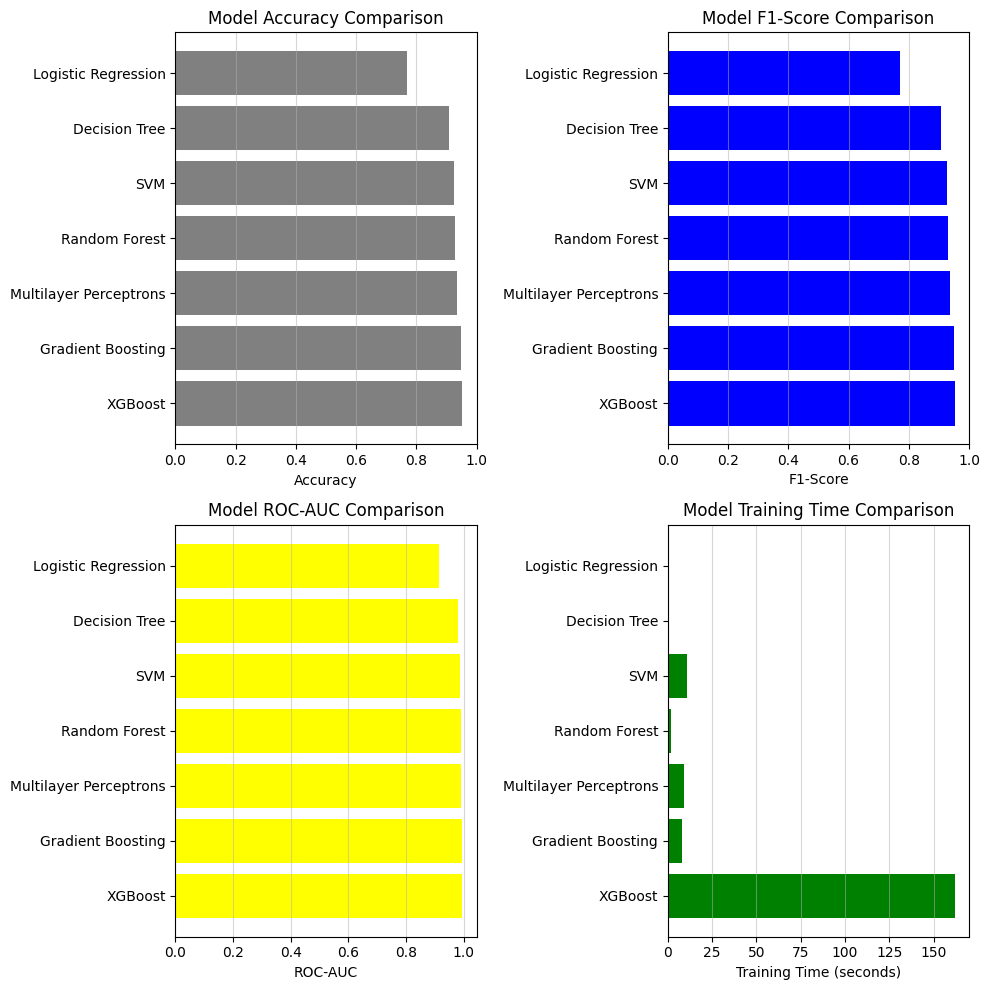

In [ ]:
# comparison dataframe
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("Model Performance Comparison:")
display(comparison_df.round(4))

# Visualize comparison
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Accuracy comparison
axes[0, 0].barh(comparison_df['Model'], comparison_df['Accuracy'], color='grey')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].grid(axis='x', alpha=0.5)

# F1-Score comparison
axes[0, 1].barh(comparison_df['Model'], comparison_df['F1-Score'], color='blue')
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('Model F1-Score Comparison')
axes[0, 1].grid(axis='x', alpha=0.5)

# ROC-AUC comparison
axes[1, 0].barh(comparison_df['Model'], comparison_df['ROC-AUC'], color='yellow')
axes[1, 0].set_xlabel('ROC-AUC')
axes[1, 0].set_title('Model ROC-AUC Comparison')
axes[1, 0].grid(axis='x', alpha=0.5)

# Training time comparison
axes[1, 1].barh(comparison_df['Model'], comparison_df['Training Time (s)'], color='green')
axes[1, 1].set_xlabel('Training Time (seconds)')
axes[1, 1].set_title('Model Training Time Comparison')
axes[1, 1].grid(axis='x', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
# best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = model_results[best_model_name]['model']
best_predictions = model_results[best_model_name]['predictions']

print(f"Best Performing Model: {best_model_name}")
print(f"F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")

# Detailed report for best model
print(f"\nDetailed Report for {best_model_name}:")
print()
print(classification_report(y_test, best_predictions,
                           target_names=target_encoder.classes_))

Best Performing Model: XGBoost
F1-Score: 0.9533

Detailed Report for XGBoost:

                   precision    recall  f1-score   support

Moderate Accident       0.93      0.95      0.94      1070
      No Accident       0.97      0.93      0.95      1020
  Severe Accident       0.96      0.97      0.97       930

         accuracy                           0.95      3020
        macro avg       0.95      0.95      0.95      3020
     weighted avg       0.95      0.95      0.95      3020



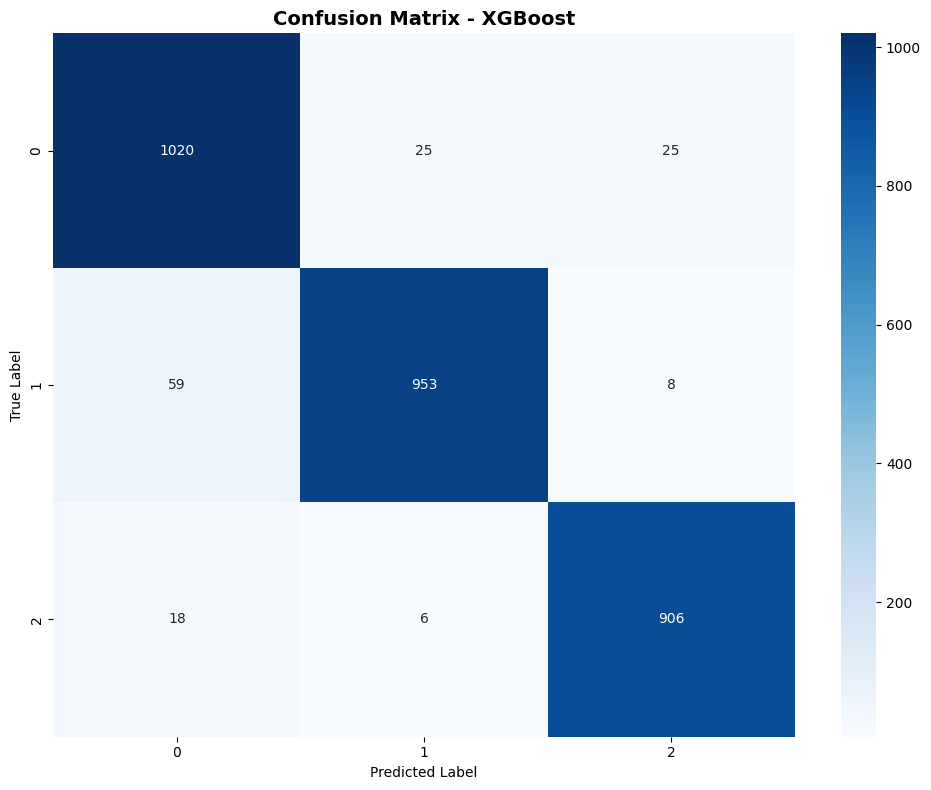

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# **MULTI-LEVEL EXPLAINABILITY ANALYSIS**

# **`SHAP Analysis (Global Explainability)`**

In [ ]:
# Install SHAP
!pip install shap -q

import shap

print("Done installing SHAP!")

Done installing SHAP!


SHAP values calculated successfully

Global Feature Importance (SHAP):


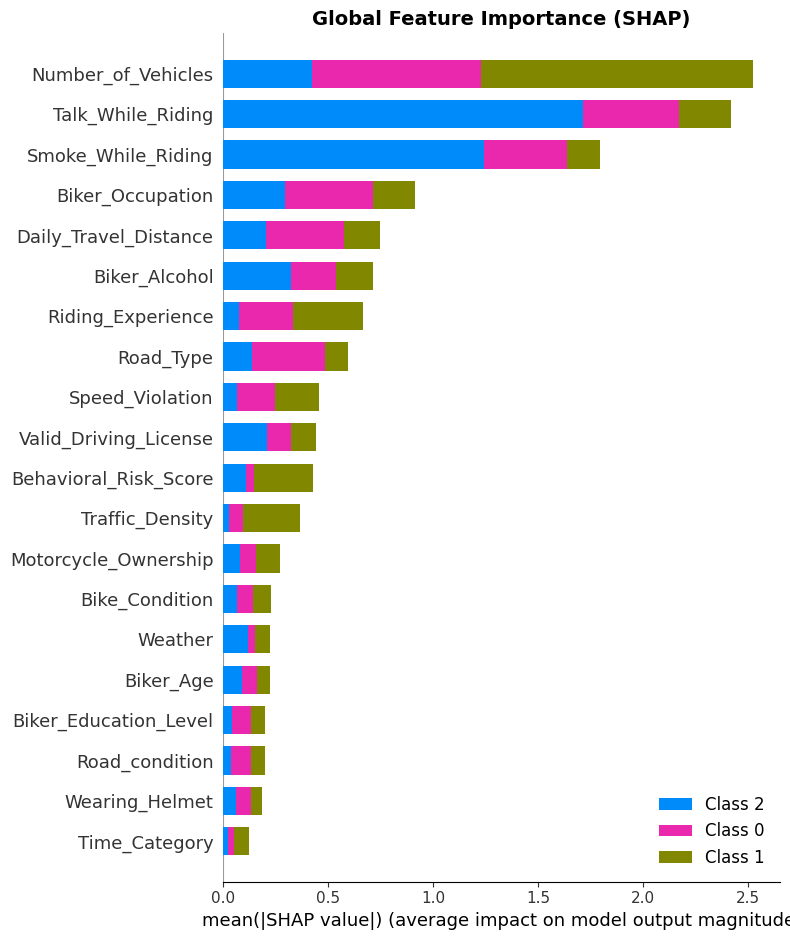

In [ ]:
# Initialize SHAP explainer based on best model
if best_model_name in ['Random Forest', 'XGBoost', 'Decision Tree', 'Gradient Boosting']:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test_scaled)
    X_test_shap = X_test_scaled
elif best_model_name == 'SVM':
    # For SVM, use KernelExplainer with a sample
    X_sample = shap.sample(X_train_scaled, 100)
    explainer = shap.KernelExplainer(best_model.predict_proba, X_sample)
    shap_values = explainer.shap_values(X_test_scaled[:100])
    X_test_shap = X_test_scaled[:100]
else:
    # For other models (Neural Network, Logistic Regression)
    X_sample = shap.sample(X_train_scaled, 100)
    explainer = shap.KernelExplainer(best_model.predict_proba, X_sample)
    shap_values = explainer.shap_values(X_test_scaled[:100])
    X_test_shap = X_test_scaled[:100]

print("SHAP values calculated successfully")

# Global Feature Importance
print("\nGlobal Feature Importance (SHAP):")

plt.figure(figsize=(7, 7))
if isinstance(shap_values, list):
    # Multi-class case - use class 0 or average
    shap.summary_plot(shap_values[0], X_test_scaled if best_model_name in ['Random Forest', 'XGBoost', 'Decision Tree'] else X_test_shap,
                     plot_type="bar", show=False)
else:
    shap.summary_plot(shap_values, X_test_scaled if best_model_name in ['Random Forest', 'XGBoost', 'Decision Tree'] else X_test_shap,
                     plot_type="bar", show=False)
plt.title('Global Feature Importance (SHAP)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<Figure size 1200x2000 with 0 Axes>

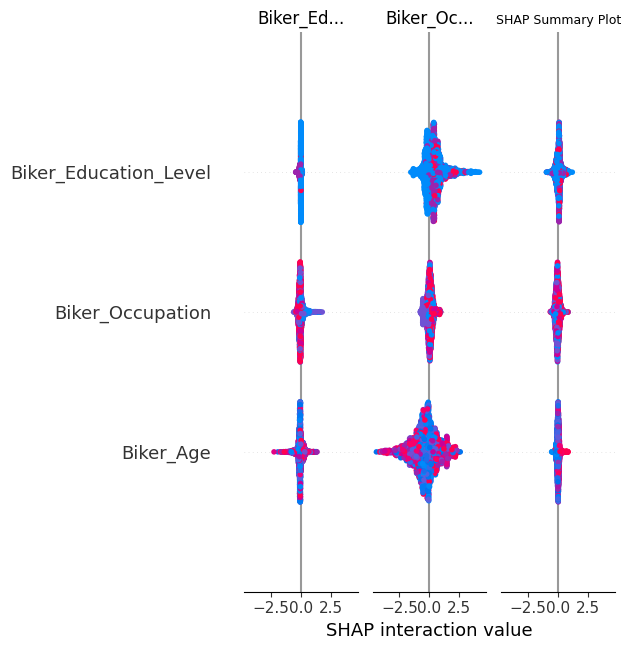

In [ ]:
# Summary Plot
plt.figure(figsize=(12, 20))
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[0], X_test_scaled if best_model_name in ['Random Forest', 'XGBoost', 'Decision Tree'] else X_test_shap, show=False)
else:
    shap.summary_plot(shap_values, X_test_scaled if best_model_name in ['Random Forest', 'XGBoost', 'Decision Tree'] else X_test_shap, show=False)
plt.title('SHAP Summary Plot', fontsize=9)
plt.tight_layout()
plt.show()

# **`LIME Analysis (Local Explainability)`**

In [ ]:
# Install LIME
!pip install lime -q

import lime
import lime.lime_tabular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


LIME explainer initialized

Explaining 3 individual predictions:

Instance 1:
True Label: Severe Accident
Predicted Label: Severe Accident


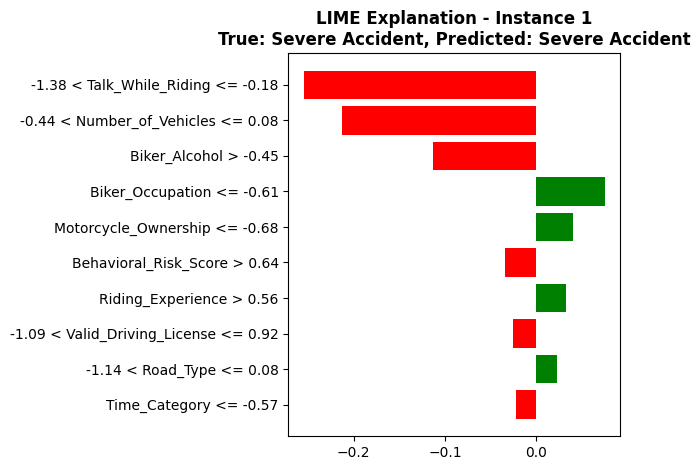


Instance 2:
True Label: No Accident
Predicted Label: No Accident


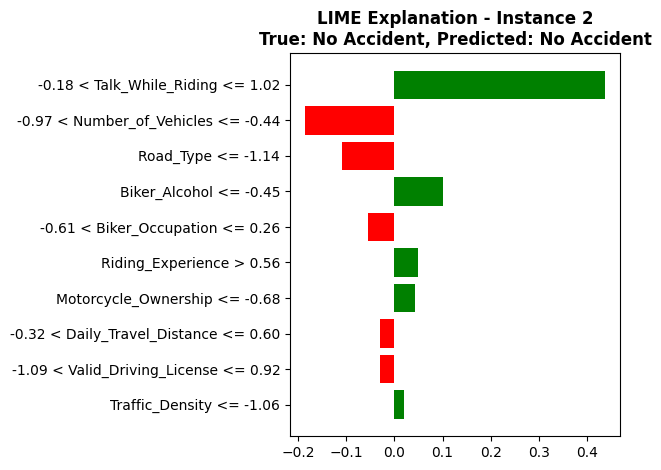


Instance 3:
True Label: No Accident
Predicted Label: No Accident


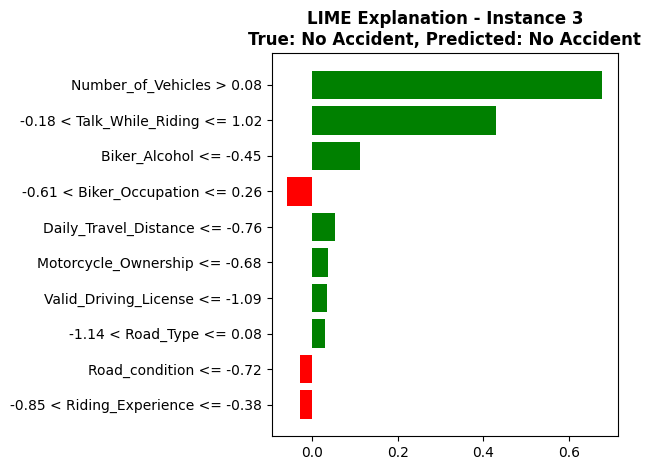

In [ ]:
# Initialize LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled.values,
    feature_names=X_train_scaled.columns.tolist(),
    class_names=target_encoder.classes_,
    mode='classification',
    random_state=42
)

print("LIME explainer initialized")

# Explain a few instances
num_instances = 3
print(f"\nExplaining {num_instances} individual predictions:")

for i in range(num_instances):
    instance_idx = i * 10  # Select instances at intervals
    if instance_idx >= len(X_test_scaled):
        break

    instance = X_test_scaled.iloc[instance_idx].values
    true_label = target_encoder.classes_[y_test[instance_idx]]
    pred_label = target_encoder.classes_[best_predictions[instance_idx]]

    print(f"\nInstance {i+1}:")
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {pred_label}")

    # Generate explanation
    explanation = lime_explainer.explain_instance(
        instance,
        best_model.predict_proba,
        num_features=10
    )

    # Show explanation
    fig = explanation.as_pyplot_figure()
    plt.title(f'LIME Explanation - Instance {i+1}\nTrue: {true_label}, Predicted: {pred_label}',
              fontsize=12, fontweight='bold')
    plt.tight_layout()
    plt.show()

# **`BEHAVIORAL RISK PROFILING`**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
print("BEHAVIORAL RISK PROFILING")

# Recreate df_processed by combining train and test
df_processed = pd.concat([
    pd.concat([X_train_raw, y_train_raw], axis=1),
    pd.concat([X_test_raw, y_test_raw], axis=1)
], axis=0).reset_index(drop=True)

print(f"\nDataset size: {len(df_processed)} riders")

BEHAVIORAL RISK PROFILING

Dataset size: 15100 riders


In [ ]:
# Calculate Behavioral Risk Score
print("Calculating Behavioral Risk Score")

df_processed['Behavioral_Risk_Score'] = (
    df_processed['Talk_While_Riding'].map({'Yes': 1, 'No': 0}).fillna(0) +
    df_processed['Smoke_While_Riding'].map({'Yes': 1, 'No': 0}).fillna(0) +
    df_processed['Wearing_Helmet'].map({'No': 1, 'Yes': 0}).fillna(0) +
    df_processed['Valid_Driving_License'].map({'No': 1, 'Yes': 0}).fillna(0) +
    df_processed['Biker_Alcohol'] * 2
)

print("\nRisk Score Statistics:")
print(df_processed['Behavioral_Risk_Score'].describe())
print("\nRisk Score Distribution:")
print(df_processed['Behavioral_Risk_Score'].value_counts().sort_index().head(10))


Calculating Behavioral Risk Score

Risk Score Statistics:
count    15100.000000
mean         1.267748
std          1.132651
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: Behavioral_Risk_Score, dtype: float64

Risk Score Distribution:
Behavioral_Risk_Score
0.0    4412
1.0    5149
2.0    3500
3.0    1162
4.0     877
Name: count, dtype: int64


In [ ]:
# Select Features for Clustering
print("Selecting Features for Clustering")

behavioral_features = ['Behavioral_Risk_Score']

for col in ['Biker_Age', 'Riding_Experience']:
    if col in df_processed.columns:
        behavioral_features.append(col)

print(f"Using {len(behavioral_features)} features:")
for feat in behavioral_features:
    print(f"  - {feat}")

X_behavioral = df_processed[behavioral_features].copy()


Selecting Features for Clustering
Using 3 features:
  - Behavioral_Risk_Score
  - Biker_Age
  - Riding_Experience


In [ ]:
# Scale the Data
scaler_cluster = StandardScaler()
X_behavioral_scaled = scaler_cluster.fit_transform(X_behavioral)

Determining Optimal Clusters
  K=2: Silhouette Score = 0.3480
  K=3: Silhouette Score = 0.2994
  K=4: Silhouette Score = 0.3219
  K=5: Silhouette Score = 0.3313
  K=6: Silhouette Score = 0.3259


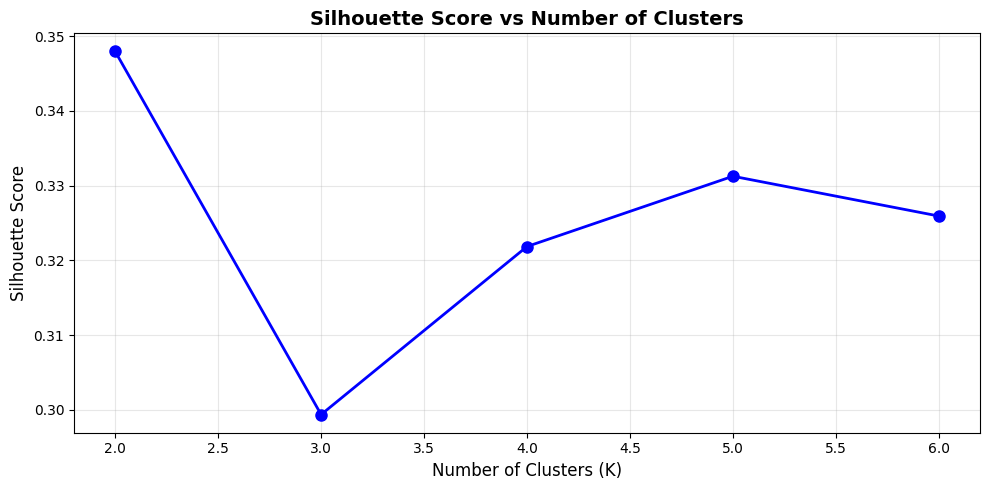

In [ ]:
# Determine Optimal Clusters
print("Determining Optimal Clusters")

silhouette_scores = []
K_range = range(2, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_behavioral_scaled)
    score = silhouette_score(X_behavioral_scaled, labels)
    silhouette_scores.append(score)
    print(f"  K={k}: Silhouette Score = {score:.4f}")

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(K_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Perform Clustering
optimal_k = 4
print(f"Performing Clustering (K={optimal_k})")

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_processed['Rider_Cluster'] = kmeans_final.fit_predict(X_behavioral_scaled)

print("\nSorting clusters by severe accident rate...")
cluster_severity = df_processed.groupby('Rider_Cluster').apply(
    lambda x: (x['Accident_Severity'] == 'Severe Accident').sum() / len(x),
    include_groups=False
).sort_values()

cluster_mapping = {old_id: new_id for new_id, old_id in enumerate(cluster_severity.index)}
df_processed['Rider_Profile'] = df_processed['Rider_Cluster'].map(cluster_mapping)

cluster_names = {
    0: 'Safest Riders',
    1: 'Low-Risk Riders',
    2: 'High-Risk Riders',
    3: 'Severe Accident Prone'
}

Performing Clustering (K=4)

Sorting clusters by severe accident rate...


In [ ]:
# Analyzing Clusters
print("Cluster Analysis:")

for cluster_id in range(optimal_k):
    cluster_data = df_processed[df_processed['Rider_Profile'] == cluster_id]
    severe_rate = (cluster_data['Accident_Severity'] == 'Severe Accident').sum() / len(cluster_data) * 100

    print(f"\n{cluster_names[cluster_id]} (Profile {cluster_id}):")
    print(f"  Size: {len(cluster_data):,} riders ({len(cluster_data)/len(df_processed)*100:.1f}%)")
    print(f"  Avg Risk Score: {cluster_data['Behavioral_Risk_Score'].mean():.2f}")
    print(f"  Severe Accident Rate: {severe_rate:.1f}%")
    print(f"  Accident Distribution:")

    severity_dist = cluster_data['Accident_Severity'].value_counts(normalize=True) * 100
    for severity in ['No Accident', 'Moderate Accident', 'Severe Accident']:
        pct = severity_dist.get(severity, 0)
        print(f"    {severity}: {pct:.1f}%")


Cluster Analysis:

Safest Riders (Profile 0):
  Size: 3,489 riders (23.1%)
  Avg Risk Score: 0.69
  Severe Accident Rate: 13.1%
  Accident Distribution:
    No Accident: 41.4%
    Moderate Accident: 45.5%
    Severe Accident: 13.1%

Low-Risk Riders (Profile 1):
  Size: 3,079 riders (20.4%)
  Avg Risk Score: 0.92
  Severe Accident Rate: 19.8%
  Accident Distribution:
    No Accident: 45.0%
    Moderate Accident: 35.1%
    Severe Accident: 19.8%

High-Risk Riders (Profile 2):
  Size: 4,193 riders (27.8%)
  Avg Risk Score: 0.62
  Severe Accident Rate: 24.7%
  Accident Distribution:
    No Accident: 32.6%
    Moderate Accident: 42.6%
    Severe Accident: 24.7%

Severe Accident Prone (Profile 3):
  Size: 4,339 riders (28.7%)
  Avg Risk Score: 2.61
  Severe Accident Rate: 58.7%
  Accident Distribution:
    No Accident: 20.8%
    Moderate Accident: 20.6%
    Severe Accident: 58.7%


Creating Visualizations



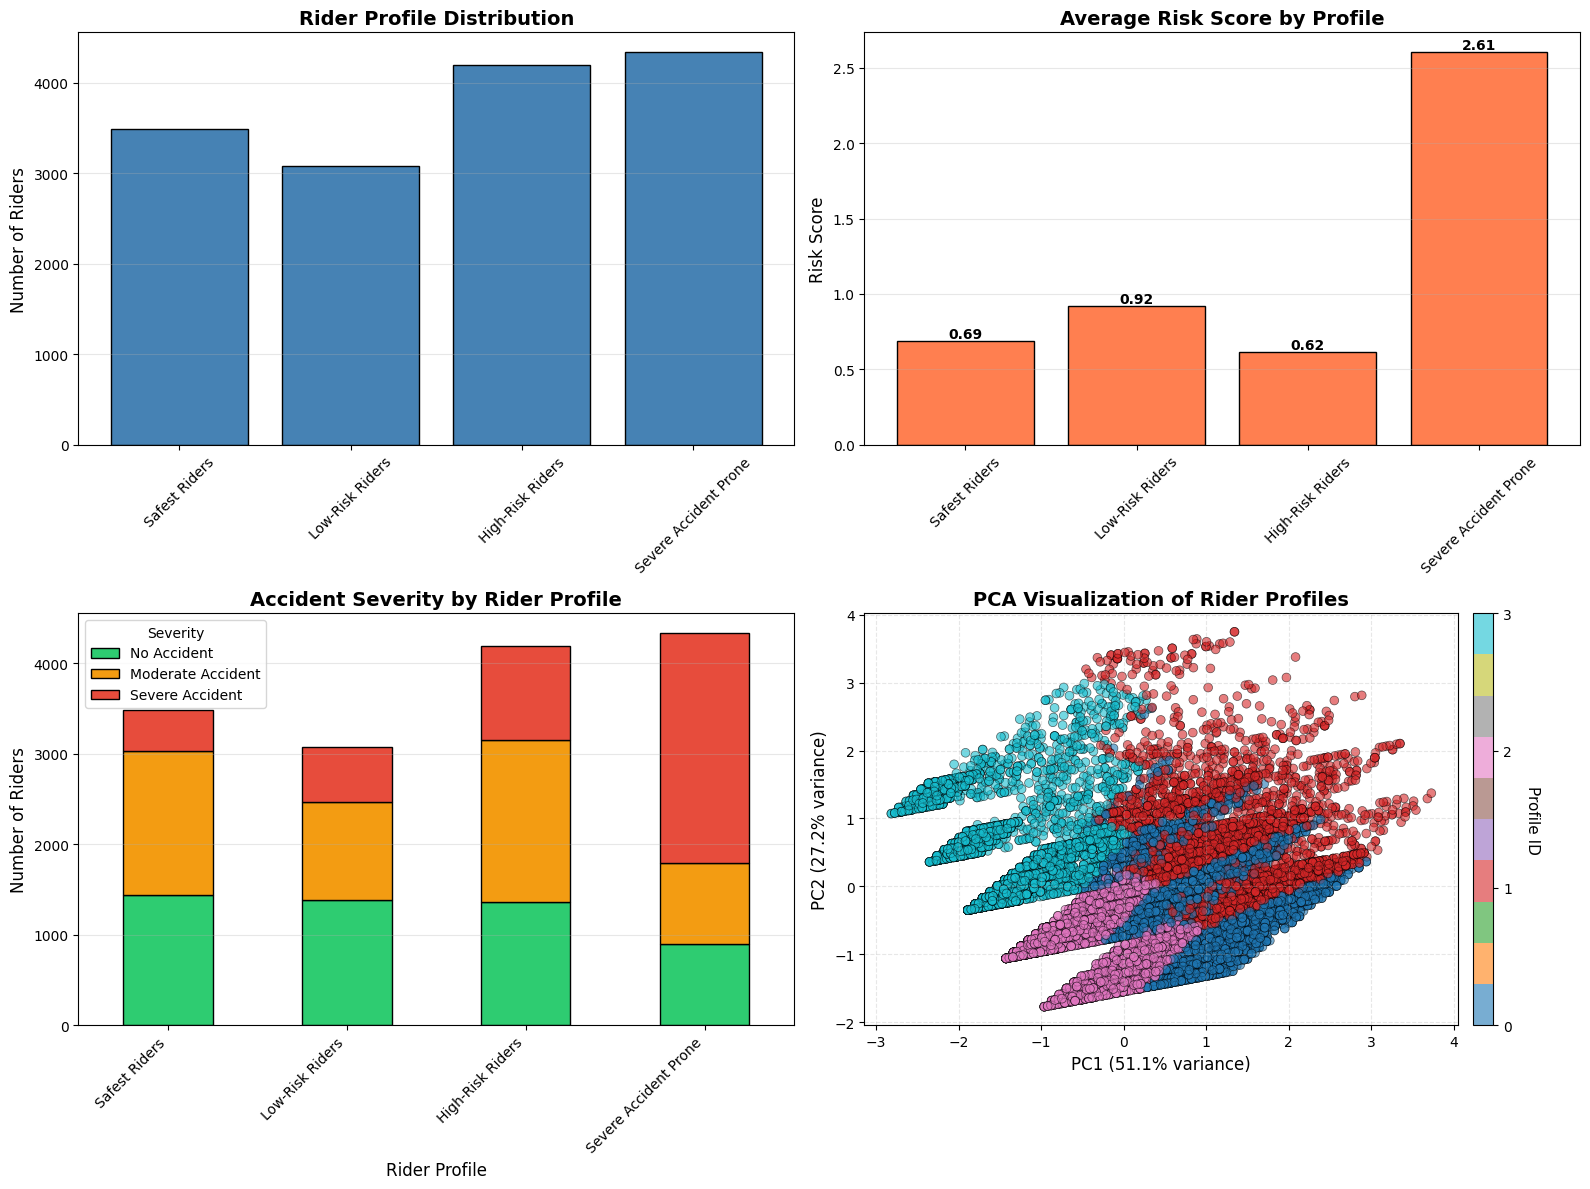

<Figure size 640x480 with 0 Axes>

In [ ]:
print("Creating Visualizations\n")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Cluster Size Distribution
cluster_sizes = [len(df_processed[df_processed['Rider_Profile']==i]) for i in range(optimal_k)]
axes[0, 0].bar([cluster_names[i] for i in range(optimal_k)], cluster_sizes,
               color='steelblue', edgecolor='black')
axes[0, 0].set_title('Rider Profile Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Number of Riders', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0, 0].grid(axis='y', alpha=0.3)

# Average Risk Score by Profile
risk_by_cluster = [df_processed[df_processed['Rider_Profile']==i]['Behavioral_Risk_Score'].mean()
                   for i in range(optimal_k)]
bars = axes[0, 1].bar([cluster_names[i] for i in range(optimal_k)], risk_by_cluster,
                       color='coral', edgecolor='black')
axes[0, 1].set_title('Average Risk Score by Profile', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Risk Score', fontsize=12)
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=10)
axes[0, 1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Accident Severity Distribution
severity_data = df_processed.groupby(['Rider_Profile', 'Accident_Severity']).size().unstack(fill_value=0)
severity_data = severity_data[['No Accident', 'Moderate Accident', 'Severe Accident']]
severity_data.plot(kind='bar', stacked=True, ax=axes[1, 0],
                   color=['#2ecc71', '#f39c12', '#e74c3c'], edgecolor='black')
axes[1, 0].set_title('Accident Severity by Rider Profile', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Rider Profile', fontsize=12)
axes[1, 0].set_ylabel('Number of Riders', fontsize=12)
axes[1, 0].set_xticklabels([cluster_names[i] for i in range(optimal_k)], rotation=45, ha='right')
axes[1, 0].legend(title='Severity', loc='upper left', fontsize=10)
axes[1, 0].grid(axis='y', alpha=0.3)

# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_behavioral_scaled)

scatter = axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1],
                             c=df_processed['Rider_Profile'],
                             cmap='tab10', alpha=0.6, s=40,
                             edgecolors='black', linewidth=0.5)

axes[1, 1].set_title('PCA Visualization of Rider Profiles', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
axes[1, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, linestyle='--')

# Add colorbar
cbar = fig.colorbar(scatter, ax=axes[1, 1], pad=0.02)
cbar.set_label('Profile ID', rotation=270, labelpad=20, fontsize=11)
cbar.set_ticks(range(optimal_k))
cbar.set_ticklabels([f'{i}' for i in range(optimal_k)])

plt.tight_layout()
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_behavioral_scaled)

scatter = axes[1, 1].scatter(X_pca[:, 0], X_pca[:, 1],
                             c=df_processed['Rider_Profile'],
                             cmap='tab10', alpha=0.6, s=40,
                             edgecolors='black', linewidth=0.5)

axes[1, 1].set_title('PCA Visualization of Rider Profiles', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)', fontsize=12)
axes[1, 1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)', fontsize=12)
axes[1, 1].grid(True, alpha=0.3, linestyle='--')

# Add colorbar
cbar = fig.colorbar(scatter, ax=axes[1, 1], pad=0.02)
cbar.set_label('Profile ID', rotation=270, labelpad=20, fontsize=11)
cbar.set_ticks(range(optimal_k))
cbar.set_ticklabels([f'{i}' for i in range(optimal_k)])

plt.tight_layout()
plt.show()

In [ ]:
print("=== Top Risk Factors (SHAP Analysis) ===")

feature_cols_current = X_test_scaled.columns.tolist()

if isinstance(shap_values, list):
    shap_importance = np.mean([np.abs(sv).mean(0) for sv in shap_values], axis=0)
else:
    if shap_values.ndim == 3:
        shap_importance = np.abs(shap_values).mean(axis=(0, 2))
    elif shap_values.ndim == 2:
        shap_importance = np.abs(shap_values).mean(axis=0)
    else:
        shap_importance = np.abs(shap_values).mean(0)

feature_importance_df = pd.DataFrame({
    'Feature': feature_cols_current,
    'SHAP_Importance': shap_importance
}).sort_values('SHAP_Importance', ascending=False)

print("\nTop 10 Risk Factors:")
print(feature_importance_df.head(10).to_string(index=False))

=== Top Risk Factors (SHAP Analysis) ===

Top 10 Risk Factors:
              Feature  SHAP_Importance
   Number_of_Vehicles         0.842051
    Talk_While_Riding         0.806108
   Smoke_While_Riding         0.598972
     Biker_Occupation         0.303954
Daily_Travel_Distance         0.248744
        Biker_Alcohol         0.237589
    Riding_Experience         0.222074
            Road_Type         0.198135
      Speed_Violation         0.152609
Valid_Driving_License         0.146652
